#### 基本思路

提取图像特征值，存入HBase,进行查重。

#### 特征值提取

图像相似性搜索领域，一般先图像特征量化，然后进行相应的匹配。

1、方向一：描述符。先抽取图像局部特征符，根据一些匹配算法进行匹对，较多适合在图像比对，人脸比对等领域；

2、方向二：描述符的特征。先抽取图像局部特征符，描述符堆砌然后降维下来，成为拥有全局信息的图像特征向量，适合形成图指纹；

3、方向三：颜色特征。使用直方图，后计算两两之间的误差，较多使其向量化，比较适合多量图像。

4、方向四：哈希化。适合大规模搜索，哈希化之后去重，或进行搜索。

5、方向五：triplet loss。深度学习，从图片相似度学习图片的表示


#### 参考
- [实例检索︱图像的实例搜索（文献、方法描述、商业案例）](https://blog.csdn.net/sinat_26917383/article/details/63306206)

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from img_feature import sift, surf, orb
from helper import showimg
import matplotlib.pyplot as plt
import cv2

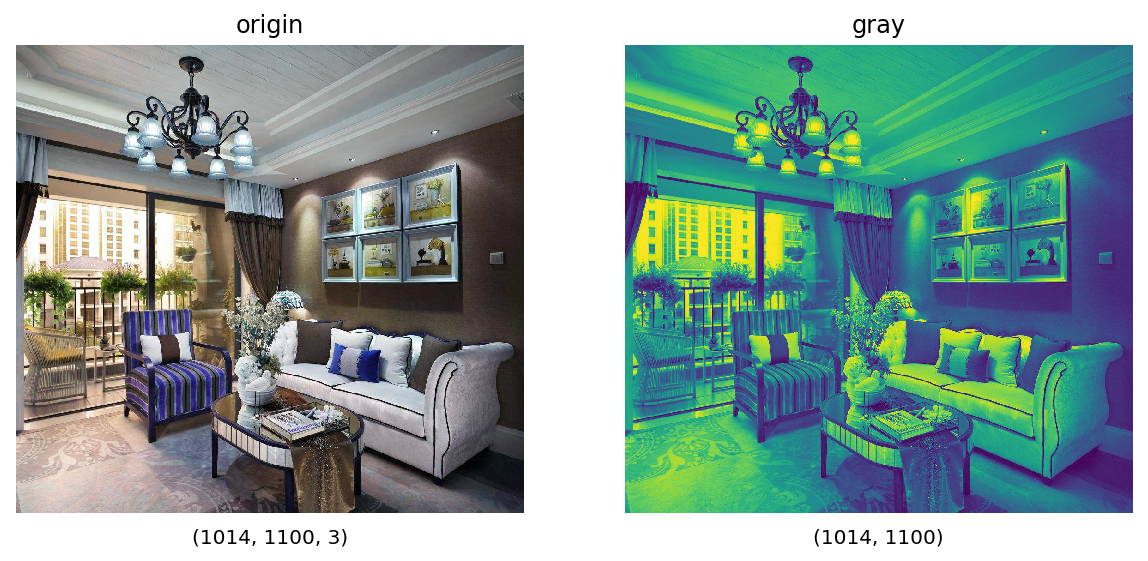

In [2]:
import cv2
img  = cv2.imread('images/demo.jpg')
gray= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

fig, axs = plt.subplots(1, 2, figsize=(10, 10))

showimg(img, ax=axs[0], title='origin')
showimg(gray, ax=axs[1], title='gray')

#### SIFT特征（尺度不变特征变换，scale-Invariant feature transform）

2004年提出的Scale Invariant Feature Transform (SIFT) 是改进的基于尺度不变的特征检测器。 
该函数会对不同的的图像尺度输出相同的结果。注意：SIFT并不检测关键点，但SIFT会通过一个特征向量来描述关键点周围区域的情况。 
SIFT并不检测DOG（difference of gaussians）

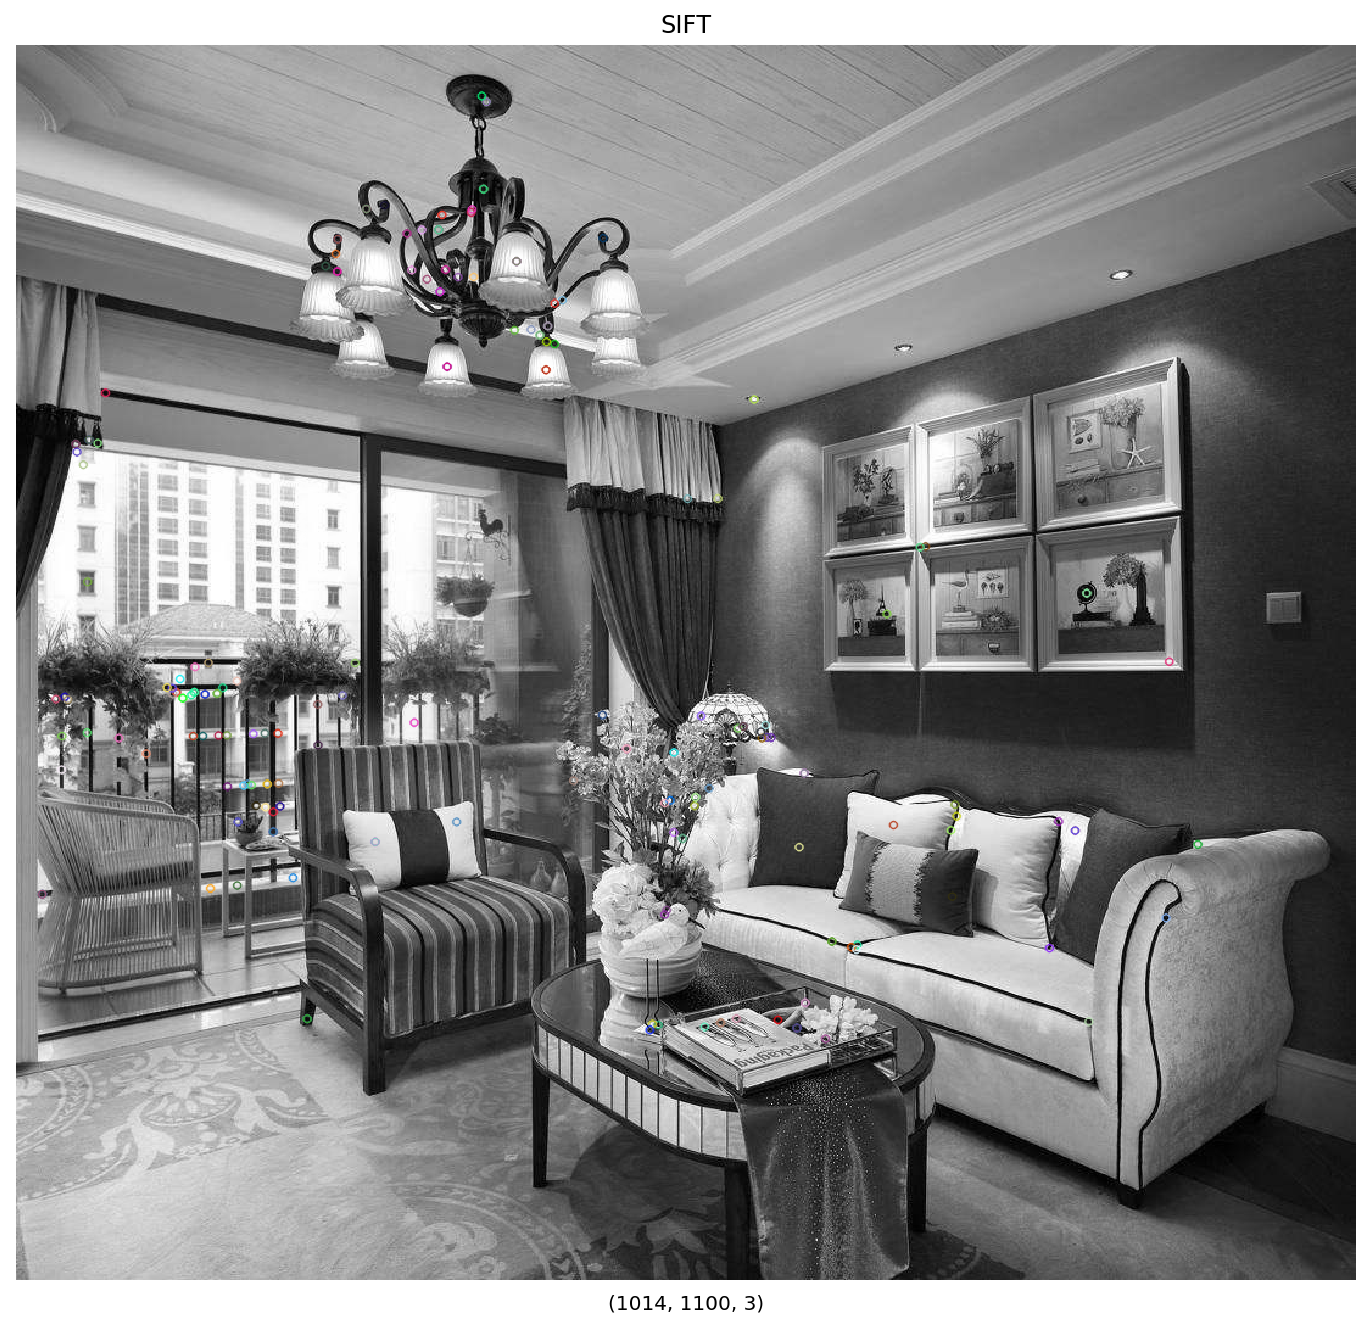

In [3]:
img_sift, sift_kp, sift_des = sift('images/demo.jpg')

fig, ax = plt.subplots(figsize=(12, 12))
showimg(img_sift, ax=ax, title='SIFT')

#### SURF特征
SURF采用快速Hessian算法检测关键点+提取特征。 
Surf在速度上比sift要快许多，这主要得益于它的积分图技术，已经Hessian矩阵的利用减少了降采样过程，另外它得到的特征向量维数也比较少，有利于更快的进行特征点匹配。

SURF受Hessian阈值影响很大，阈值越高能识别的特征就越少，所以最优的特征可以采用最优检测的方法。 
换句话说，SURF抽取的特征点是随机的，不是固定的。 

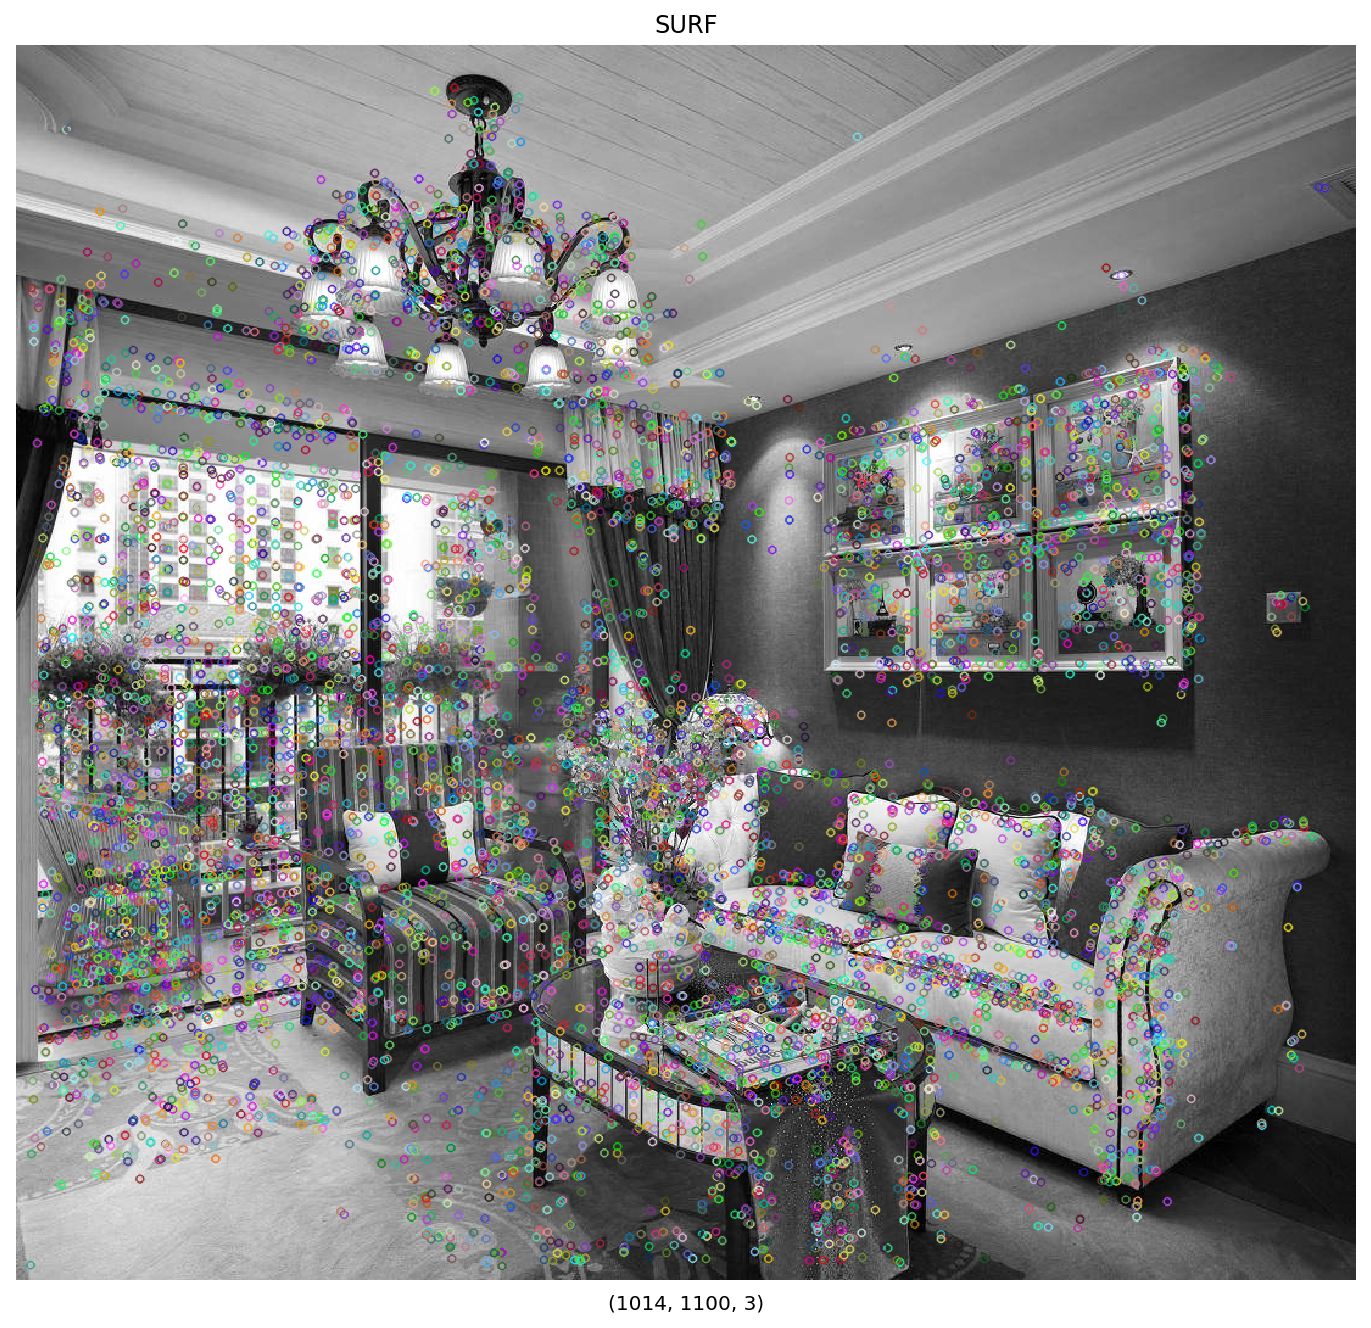

In [4]:
img_surf, surf_kp, surf_des = surf('images/demo.jpg')

fig, ax = plt.subplots(figsize=(12, 12))
showimg(img_surf, ax=ax, title='SURF')

#### ORB特征
一种新的具有局部不变性的特征 —— ORB特征，从它的名字中可以看出它是对FAST特征点与BREIF特征描述子的一种结合与改进，这个算法是由Ethan Rublee,Vincent Rabaud,Kurt Konolige以及Gary R.Bradski在2011年一篇名为“ORB：An Efficient Alternative to SIFT or SURF”的文章中提出。

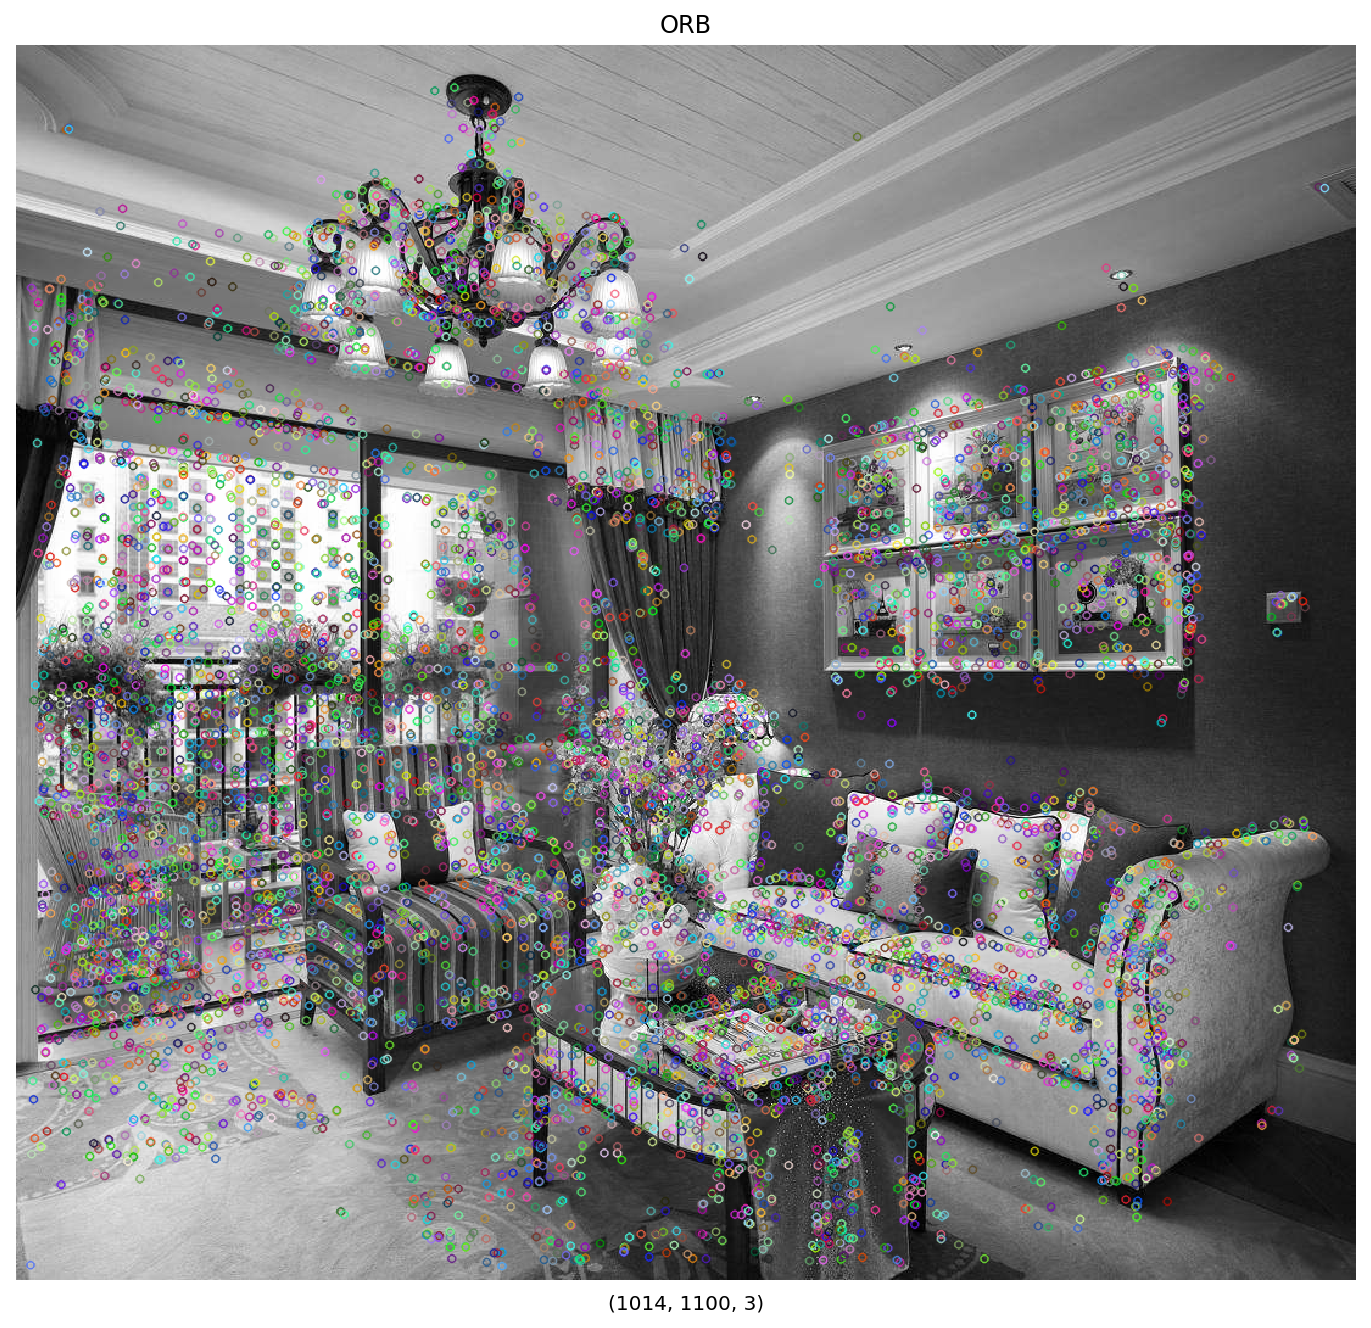

In [5]:
img_orb, orb_kp, orb_des = surf('images/demo.jpg')

fig, ax = plt.subplots(figsize=(12, 12))
showimg(img_orb, ax=ax, title='ORB')

#### SIFT、SURF、OBR三者比较
（1）SURF与SIFT效率对比
一般来说，SURF算法的效率是SIFT算法的3倍左右，而检测出的特征点的个数是SIFT算法的1/3左右，当然也和图像大小、纹理复杂程度、 算法参数设置有关。从第(5)组例子中可以看出，SURF算法在边缘抑制上做的似乎没有SIFT好，好多边缘都被检测成了特征点，从而导致特征点个数多于 SIFT。（本节转载于：SIFT算法与SURF算法特征检测效率对比）

（2）专利情况
ORB是除了SIFT与SURF外一个很好的选择，而且它有很高的效率，最重要的一点是它是免费的，SIFT与SURF都是有专利的，你如果在商业软件中使用，需要购买许可。

（3）三者在特征点选择的特征
SIFT输出的特征点，可以固定， 
SURF、OBR，特征点弹性的，比sift要精练一些。

In [27]:
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=False)
matches = bf.match(sift_des, sift_des)
matcher = sorted(matches , key = lambda x : x.distance)

#### 哈希化


In [31]:
import numpy as np

arr = np.array([[1, 2], [3, 4]])
arr.flatten()

array([1, 2, 3, 4])